In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


# Import Rosbag Data

In [2]:
ls

brake_calibration.ipynb  cs_2,9.png                         sp_2,25.png
cs_1,125.png             log_brake_2020-08-13-11-52-40.bag  sp_2,9.png
cs_2,25.png              sp_1,125.png


In [3]:
bag = rosbag.Bag('log_brake_2020-08-13-11-52-40.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'pkg_ta/LogBrakeCommand': '7f3b1ab4918c50642f07c6849a030a08'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/LogBrakeCommand', message_count=1316, connections=1, frequency=20.000686669082725), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=13103, connections=1, frequency=195.57055929872007)})

In [4]:
list_topic = []
list_msg = []
list_t = []
list_t_header = []
list_brake_sepoint = []
list_brake_position = []
list_brake_delta = []
list_brake_current = []
list_brake_R_current = []
list_brake_L_current = []
list_brake_pwm = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_brake_sepoint.append(msg.brake_setpoint)
    list_brake_position.append(msg.brake_position)
    list_brake_delta.append(msg.brake_delta)
    list_brake_current.append(msg.brake_current)
    list_brake_R_current.append(msg.brake_R_current)
    list_brake_L_current.append(msg.brake_L_current)
    list_brake_pwm.append(msg.brake_pwm)

brake_setpoint = np.array(list_brake_sepoint)
brake_position = np.array(list_brake_position)
brake_delta = np.array(list_brake_delta)
brake_R_current = np.array(list_brake_R_current)
brake_L_current = np.array(list_brake_L_current)
brake_pwm = np.array(list_brake_pwm)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

# CHECK TIMING

In [5]:
print('Sampling Rate yang digunakan di rospy adalah 200 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))
print('')

Sampling Rate yang digunakan di rospy adalah 200 Hz

dt
mean: 0.005019458663898504
std: 0.00046739072482162257

dt_header
mean: 0.0050195059581960985
std: 0.00017065157676699095



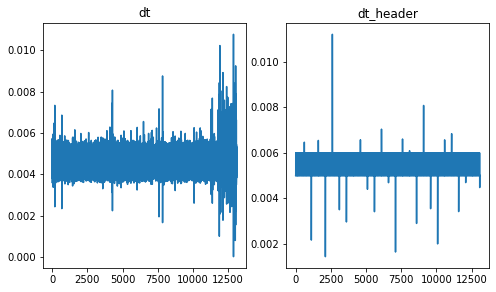

In [6]:
scale = 0.5
plt.figure(figsize=(16*scale, 9*scale))

plt.subplot(1,2,1)
plt.plot(dt)
plt.title("dt")

plt.subplot(1,2,2)
plt.plot(dt_header)
plt.title("dt_header")

plt.show()

# Analisis dan PLOT

In [7]:
print("Variasi Setpoint")
set(brake_setpoint)

Variasi Setpoint


{0.0,
 0.75,
 1.125,
 1.7999999523162842,
 2.25,
 2.4000000953674316,
 2.549999952316284,
 2.9000000953674316}

In [8]:
# Ambil yang {1.125, 2.25, 2.9}. Kalau semua bingung naro di laporannya
sp_1 = list(np.where(np.abs(brake_setpoint - 1.125) <= 0.01))[0]
sp_2 = list(np.where(np.abs(brake_setpoint - 2.25) <= 0.01))[0]
sp_3 = list(np.where(np.abs(brake_setpoint - 2.9) <= 0.01))[0]

## 1

In [9]:
add_idx = [-1,40]

lim0 = sp_1[0]+add_idx[0]
lim1 = sp_1[-1]+add_idx[-1]

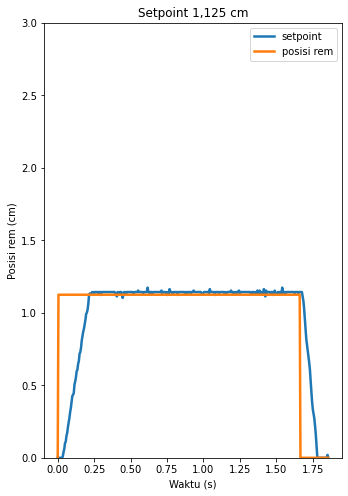

In [10]:
scale = 1.
plt.figure(figsize=(16/3*scale, 16/2*scale))

plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_position[lim0:lim1], label='setpoint', linewidth=2.5)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_setpoint[lim0:lim1], label='posisi rem', linewidth=2.5)
plt.title('Setpoint 1,125 cm')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi rem (cm)')
plt.legend()
plt.ylim(0,3)

plt.savefig('sp_1,125.png', dpi=500, transparent=True)
plt.show()

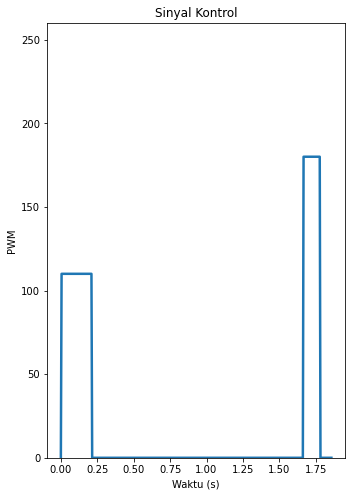

In [11]:
scale = 1.
plt.figure(figsize=(16/3*scale, 16/2*scale))

plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_pwm[lim0:lim1], linewidth=2.5)
plt.title('Sinyal Kontrol')
plt.xlabel('Waktu (s)')
plt.ylabel('PWM')
plt.ylim(0,260)
plt.savefig('cs_1,125.png', dpi=500, transparent=True)
plt.show()

## 2

In [12]:
add_idx = [-1,60]

lim0 = sp_2[0]+add_idx[0]
lim1 = sp_2[-1]+add_idx[-1]

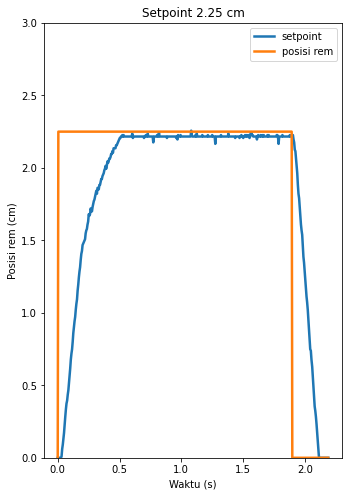

In [13]:
scale = 1.
plt.figure(figsize=(16/3*scale, 16/2*scale))

plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_position[lim0:lim1], label='setpoint', linewidth=2.5)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_setpoint[lim0:lim1], label='posisi rem', linewidth=2.5)
plt.title('Setpoint 2.25 cm')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi rem (cm)')
plt.ylim(0,3)
plt.legend()
plt.savefig('sp_2,25.png', dpi=500, transparent=True)
plt.show()

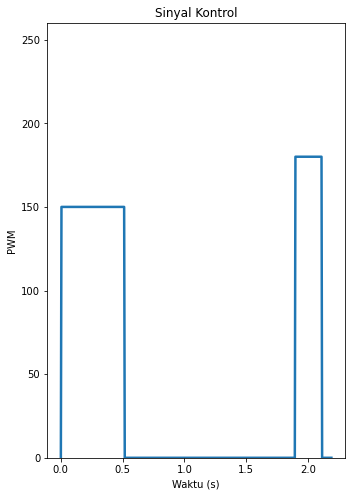

In [14]:
scale = 1.
plt.figure(figsize=(16/3*scale, 16/2*scale))

plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_pwm[lim0:lim1], linewidth=2.5)
plt.title('Sinyal Kontrol')
plt.ylim(0,260)
plt.xlabel('Waktu (s)')
plt.ylabel('PWM')
plt.savefig('cs_2,25.png', dpi=500, transparent=True)
plt.show()

## 3

In [15]:
add_idx = [-1,70]

lim0 = sp_3[0]+add_idx[0]
lim1 = sp_3[-1]+add_idx[-1]

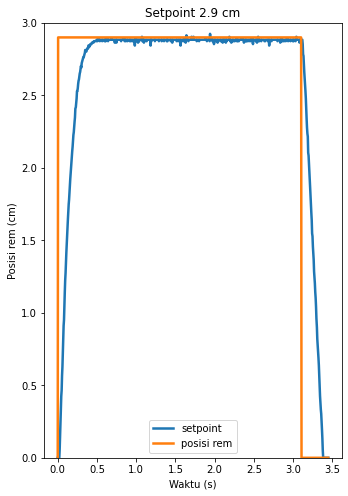

In [16]:
scale = 1.
plt.figure(figsize=(16/3*scale, 16/2*scale))

plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_position[lim0:lim1], label='setpoint', linewidth=2.5)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_setpoint[lim0:lim1], label='posisi rem', linewidth=2.5)
plt.title('Setpoint 2.9 cm')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi rem (cm)')
plt.ylim(0,3)
plt.legend()

plt.savefig('sp_2,9.png', dpi=500, transparent=True)
plt.show()

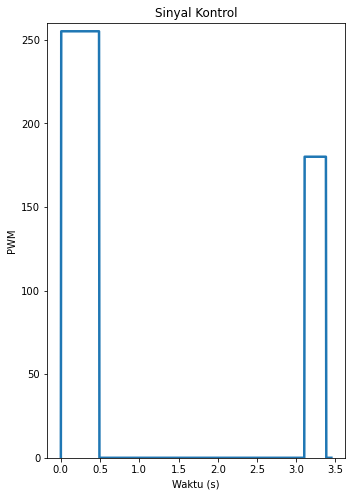

In [17]:
scale = 1.
plt.figure(figsize=(16/3*scale, 16/2*scale))

plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_pwm[lim0:lim1], linewidth=2.5)
plt.title('Sinyal Kontrol')
plt.xlabel('Waktu (s)')
plt.ylim(0,260)
plt.ylabel('PWM')

plt.savefig('cs_2,9.png', dpi=500, transparent=True)
plt.show()

## Waktu yang dibutuhkan

In [18]:
add_idx = [-1,40]

lim0 = sp_1[0]+add_idx[0]
lim1 = sp_1[-1]+add_idx[-1]
cp_1 = list(np.where(brake_pwm[lim0:lim1] >= 0.1))[0]
cp_1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
       342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354])

In [19]:
print("PULLING: {} s".format(list_t_header[lim0+1+42] - list_t_header[lim0+1]))
print("RELEASE: {} s".format(list_t_header[lim0+1+354] - list_t_header[lim0+332]))

PULLING: 0.21000003814697266 s
RELEASE: 0.11599993705749512 s


In [20]:
add_idx = [-1,60]

lim0 = sp_2[0]+add_idx[0]
lim1 = sp_2[-1]+add_idx[-1]
cp_2 = list(np.where(brake_pwm[lim0:lim1] >= 0.1))[0]
cp_2

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 378, 379,
       380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,
       393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405,
       406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
       419, 420])

In [21]:
print("PULLING: {} s".format(list_t_header[lim0+1+102] - list_t_header[lim0+1]))
print("RELEASE: {} s".format(list_t_header[lim0+1+420] - list_t_header[lim0+378]))

PULLING: 0.5120000839233398 s
RELEASE: 0.21600008010864258 s


In [22]:
add_idx = [-1,70]

lim0 = sp_3[0]+add_idx[0]
lim1 = sp_3[-1]+add_idx[-1]
cp_3 = list(np.where(brake_pwm[lim0:lim1] >= 0.1))[0]
cp_3

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97, 619, 620, 621, 622, 623, 624, 625,
       626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638,
       639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651,
       652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664,
       665, 666, 667, 668, 669, 670, 671, 672, 673])

In [23]:
print("PULLING: {} s".format(list_t_header[lim0+1+97] - list_t_header[lim0+1]))
print("RELEASE: {} s".format(list_t_header[lim0+1+673] - list_t_header[lim0+619]))

PULLING: 0.4866907596588135 s
RELEASE: 0.2760000228881836 s
